In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from calibration import Calibration

In [2]:
cali = Calibration("data/calibration_images/*.png", 6, 9)
cali.calibrate()

data/calibration_images/left*.png
data/calibration_images/right*.png


(array([[ 387.34871677],
        [-284.24876163]]),
 array([[-4079.99290326],
        [ -284.24876163]]))

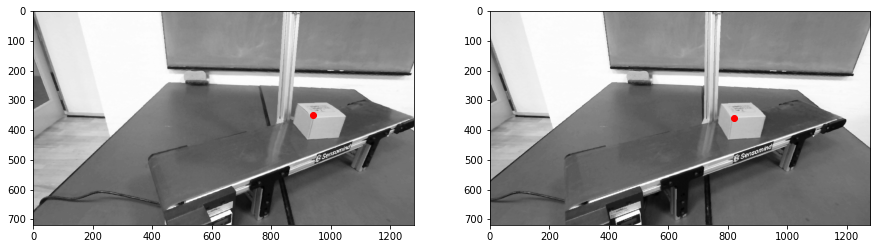

In [71]:
############# box images #############
img_left1 = cv2.imread("data/conveyorImages/left/1585434285_381072044_Left.png")
img_right1 = cv2.imread("data/conveyorImages/right/1585434285_381072044_Right.png")
img_left2 = cv2.imread("data/conveyorImages/left/1585434286_376712084_Left.png")
img_right2 = cv2.imread("data/conveyorImages/right/1585434286_376712084_Right.png")
img_left3 = cv2.imread("data/conveyorImages/left/1585434287_040472031_Left.png")
img_right3 = cv2.imread("data/conveyorImages/right/1585434287_040472031_Right.png")

dst_left1 = cali.left_remap(img_left1)
dst_left2 = cali.left_remap(img_left2)
dst_left3 = cali.left_remap(img_left3)
gray1l = cv2.cvtColor(dst_left1,cv2.COLOR_BGR2GRAY)
gray2l = cv2.cvtColor(dst_left2,cv2.COLOR_BGR2GRAY)
gray3l = cv2.cvtColor(dst_left3,cv2.COLOR_BGR2GRAY)

dst_right1 = cali.right_remap(img_right1)
dst_right2 = cali.right_remap(img_right2)
dst_right3 = cali.right_remap(img_right3)
gray1r = cv2.cvtColor(dst_right1,cv2.COLOR_BGR2GRAY)
gray2r = cv2.cvtColor(dst_right2,cv2.COLOR_BGR2GRAY)
gray3r = cv2.cvtColor(dst_right3,cv2.COLOR_BGR2GRAY)


############# calibration images #############
# img_left1 = cv2.imread("data/calibration_images/left-0001.png")
# img_left2 = cv2.imread("data/calibration_images/left-0002.png")
# img_right1 = cv2.imread("data/calibration_images/right-0001.png")
# img_right2 = cv2.imread("data/calibration_images/right-0002.png")
    

# dst_left1 = cali.left_remap(img_left1)
# dst_right1 = cali.left_remap(img_right1)
# gray1 = cv2.cvtColor(dst_left1,cv2.COLOR_BGR2GRAY)
# gray2 = cv2.cvtColor(dst_right1,cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1,2,figsize=(15,10))
ax[0].imshow(gray1l,cmap='gray')
ax[1].imshow(gray1r,cmap='gray')


c1l = np.array([[940],[350]])
c1r = np.array([[820],[360]])
c2l = np.array([790,400])
c2r = np.array([650,400])

ax[0].plot(c1l[0],c1l[1],'ro')
ax[1].plot(c1r[0],c1r[1],'ro')

Q1 = cv2.triangulatePoints(cali.P_l, cali.P_r, c1l, c1r)

Q2 = cv2.triangulatePoints(cali.P_l, cali.P_r, c2l, c2r)


# Q1 = Q1[:-1,:]/Q1[-1,:]
# Q2 = Q2[:-1,:]/Q2[-1,:]

reproj1 = cali.P_l @ Q1
reproj2 = cali.P_r @ Q2

reproj1 = reproj1[:-1,:]/reproj1[-1,:]
reproj2 = reproj2[:-1,:]/reproj2[-1,:]
reproj1,reproj2